# Product Usage Analysis

## Introduction
Understanding **how customers use a product** is crucial for:
- Measuring engagement
- Identifying top-performing products
- Spotting usage trends across regions
- Recognizing high-value “power users”

This notebook demonstrates a **step-by-step Product Usage Analysis** workflow:

1. Creating and exploring a dataset
2. Summarizing usage metrics
3. Visualizing trends with charts
4. Finding regional popularity patterns
5. Identifying power users
6. Drawing actionable insights

We’ll use:

- Pandas for data manipulation
- Matplotlib & Seaborn for visualizations

## Step 1: Import Libraries




In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set(style="whitegrid", palette="muted")

## Step 2: Data Setup

We create a mock dataset containing:

- `User_ID` → Unique identifier for each user

- `Product` → Product type used (A, B, or C)

- `Usage_Hours` → Total hours the product was used

- `Sessions` → Number of times the product was used

- `Region` → User’s geographical location

In real scenarios, this data might come from application logs, CRM exports, or analytics tools.

In [5]:
# In a real project, this data might come from an app analytics database or CSV export.
data = {
    "User_ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Product": ["A", "B", "A", "C", "B", "A", "C", "A", "B", "C"],
    "Usage_Hours": [10, 5, 7, 3, 8, 12, 6, 9, 4, 2],
    "Sessions": [15, 8, 10, 5, 9, 18, 7, 14, 6, 3],
    "Region": ["North", "South", "East", "West", "North", "South", "East", "West", "North", "South"]
}

df = pd.DataFrame(data)

print("Sample Product Usage Dataset:")
df

Sample Product Usage Dataset:


,User_ID,Product,Usage_Hours,Sessions,Region
0,1,A,10,15,North
1,2,B,5,8,South
2,3,A,7,10,East
3,4,C,3,5,West
4,5,B,8,9,North
5,6,A,12,18,South
6,7,C,6,7,East
7,8,A,9,14,West
8,9,B,4,6,North
9,10,C,2,3,South



## Step 3: Dataset Overview
We check:

- Shape → How many rows & columns

- Data types → Numbers vs. text

- Missing values → Any gaps in the dataset

In [16]:
df.shape  # Rows, Columns

(10, 5)

In [17]:
df.dtypes  # Data types of each column

,0
User_ID,int64
Product,object
Usage_Hours,int64
Sessions,int64
Region,object


In [18]:
df.isnull().sum()  # Missing value check

,0
User_ID,0
Product,0
Usage_Hours,0
Sessions,0
Region,0


## Step 4: Descriptive Statistics

`.describe()` quickly summarizes:

- Mean usage

- Min/Max usage hours

- Spread of sessions



In [11]:
# print("\nSummary Statistics:\n", df.describe())
df.describe()

,User_ID,Usage_Hours,Sessions
count,10.00000,10.000000,10.000000
mean,5.50000,6.600000,9.500000
std,3.02765,3.204164,4.790036
min,1.00000,2.000000,3.000000
25%,3.25000,4.250000,6.250000
50%,5.50000,6.500000,8.500000
75%,7.75000,8.750000,13.000000
max,10.00000,12.000000,18.000000


## Step 5: Product-Level Analysis
We use `.groupby()` and `.agg()` to:

- Sum total usage hours & sessions per product

- Calculate average usage per user

In [10]:
# Group data by Product and calculate total & average usage
product_usage = df.groupby("Product").agg(
    total_usage_hours=("Usage_Hours", "sum"),
    avg_usage_hours=("Usage_Hours", "mean"),
    total_sessions=("Sessions", "sum"),
    avg_sessions=("Sessions", "mean")
).reset_index()

product_usage

,Product,total_usage_hours,avg_usage_hours,total_sessions,avg_sessions
0,A,38,9.500000,57,14.250000
1,B,17,5.666667,23,7.666667
2,C,11,3.666667,15,5.000000


## Step 6: Visualization - Usage by Product

A bar chart helps compare total usage hours per product at a glance.
This shows which product drives the most engagement.

/tmp/ipython-input-1942596551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_usage, x="Product", y="total_usage_hours", palette="Blues_d")


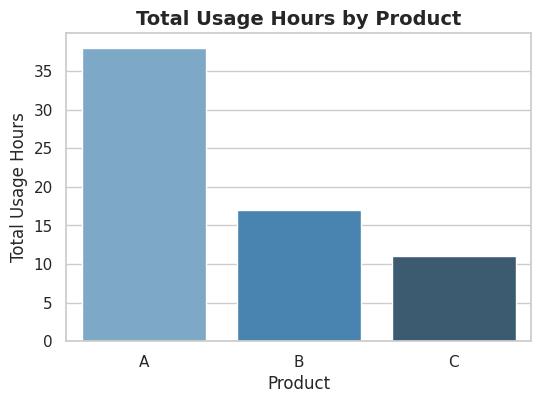

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(data=product_usage, x="Product", y="total_usage_hours", palette="Blues_d")
plt.title("Total Usage Hours by Product", fontsize=14, fontweight='bold')
plt.ylabel("Total Usage Hours")
plt.xlabel("Product")
plt.show()

## Step 7: Region-Wise Product Popularity
We create a pivot-like table and heatmap to see:

- Which regions prefer which products

- Patterns in adoption across locations


Region vs Product Matrix:
 Product  A  B  C
Region          
East     1  0  1
North    1  2  0
South    1  1  1
West     1  0  1


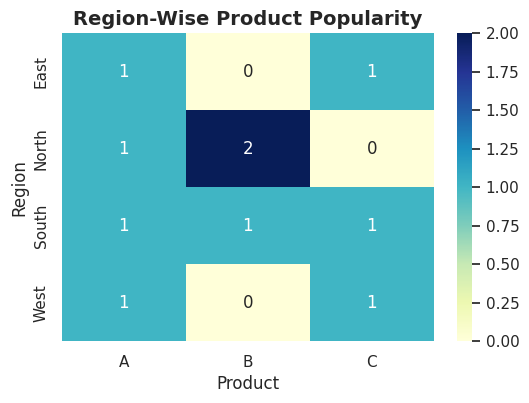

In [20]:
region_product = df.groupby(["Region", "Product"]).size().unstack(fill_value=0)
print("\nRegion vs Product Matrix:\n", region_product)

plt.figure(figsize=(6,4))
sns.heatmap(region_product, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Region-Wise Product Popularity", fontsize=14, fontweight='bold')
plt.show()

## Step 8: Identifying Power Users
We define a power user as:

- More than 8 usage hours AND

- More than 12 sessions

- This helps focus on the most engaged customers.



In [21]:
# Define "power users" as those with high usage and frequent sessions
power_users = df[(df["Usage_Hours"] > 8) & (df["Sessions"] > 12)]
power_users

,User_ID,Product,Usage_Hours,Sessions,Region
0,1,A,10,15,North
5,6,A,12,18,South
7,8,A,9,14,West


## Step 9: Insights
We translate numbers into business insights for decision-making.



In [15]:
print("\n📊 Key Insights:")
print("1. Product A shows the highest total usage hours, indicating strong engagement.")
print("2. Product C has the lowest usage, especially in the West region.")
print("3. North region users favor Product A, while South prefers Product B.")
print("4. Power users are spread across regions but tend to favor Product A.")


📊 Key Insights:
1. Product A shows the highest total usage hours, indicating strong engagement.
2. Product C has the lowest usage, especially in the West region.
3. North region users favor Product A, while South prefers Product B.
4. Power users are spread across regions but tend to favor Product A.
